In [1]:
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.82 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50094,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.82 GiB
Comm: tcp://127.0.0.1:50113,Total threads: 2
Dashboard: http://127.0.0.1:50116/status,Memory: 3.95 GiB
Nanny: tcp://127.0.0.1:50097,


8


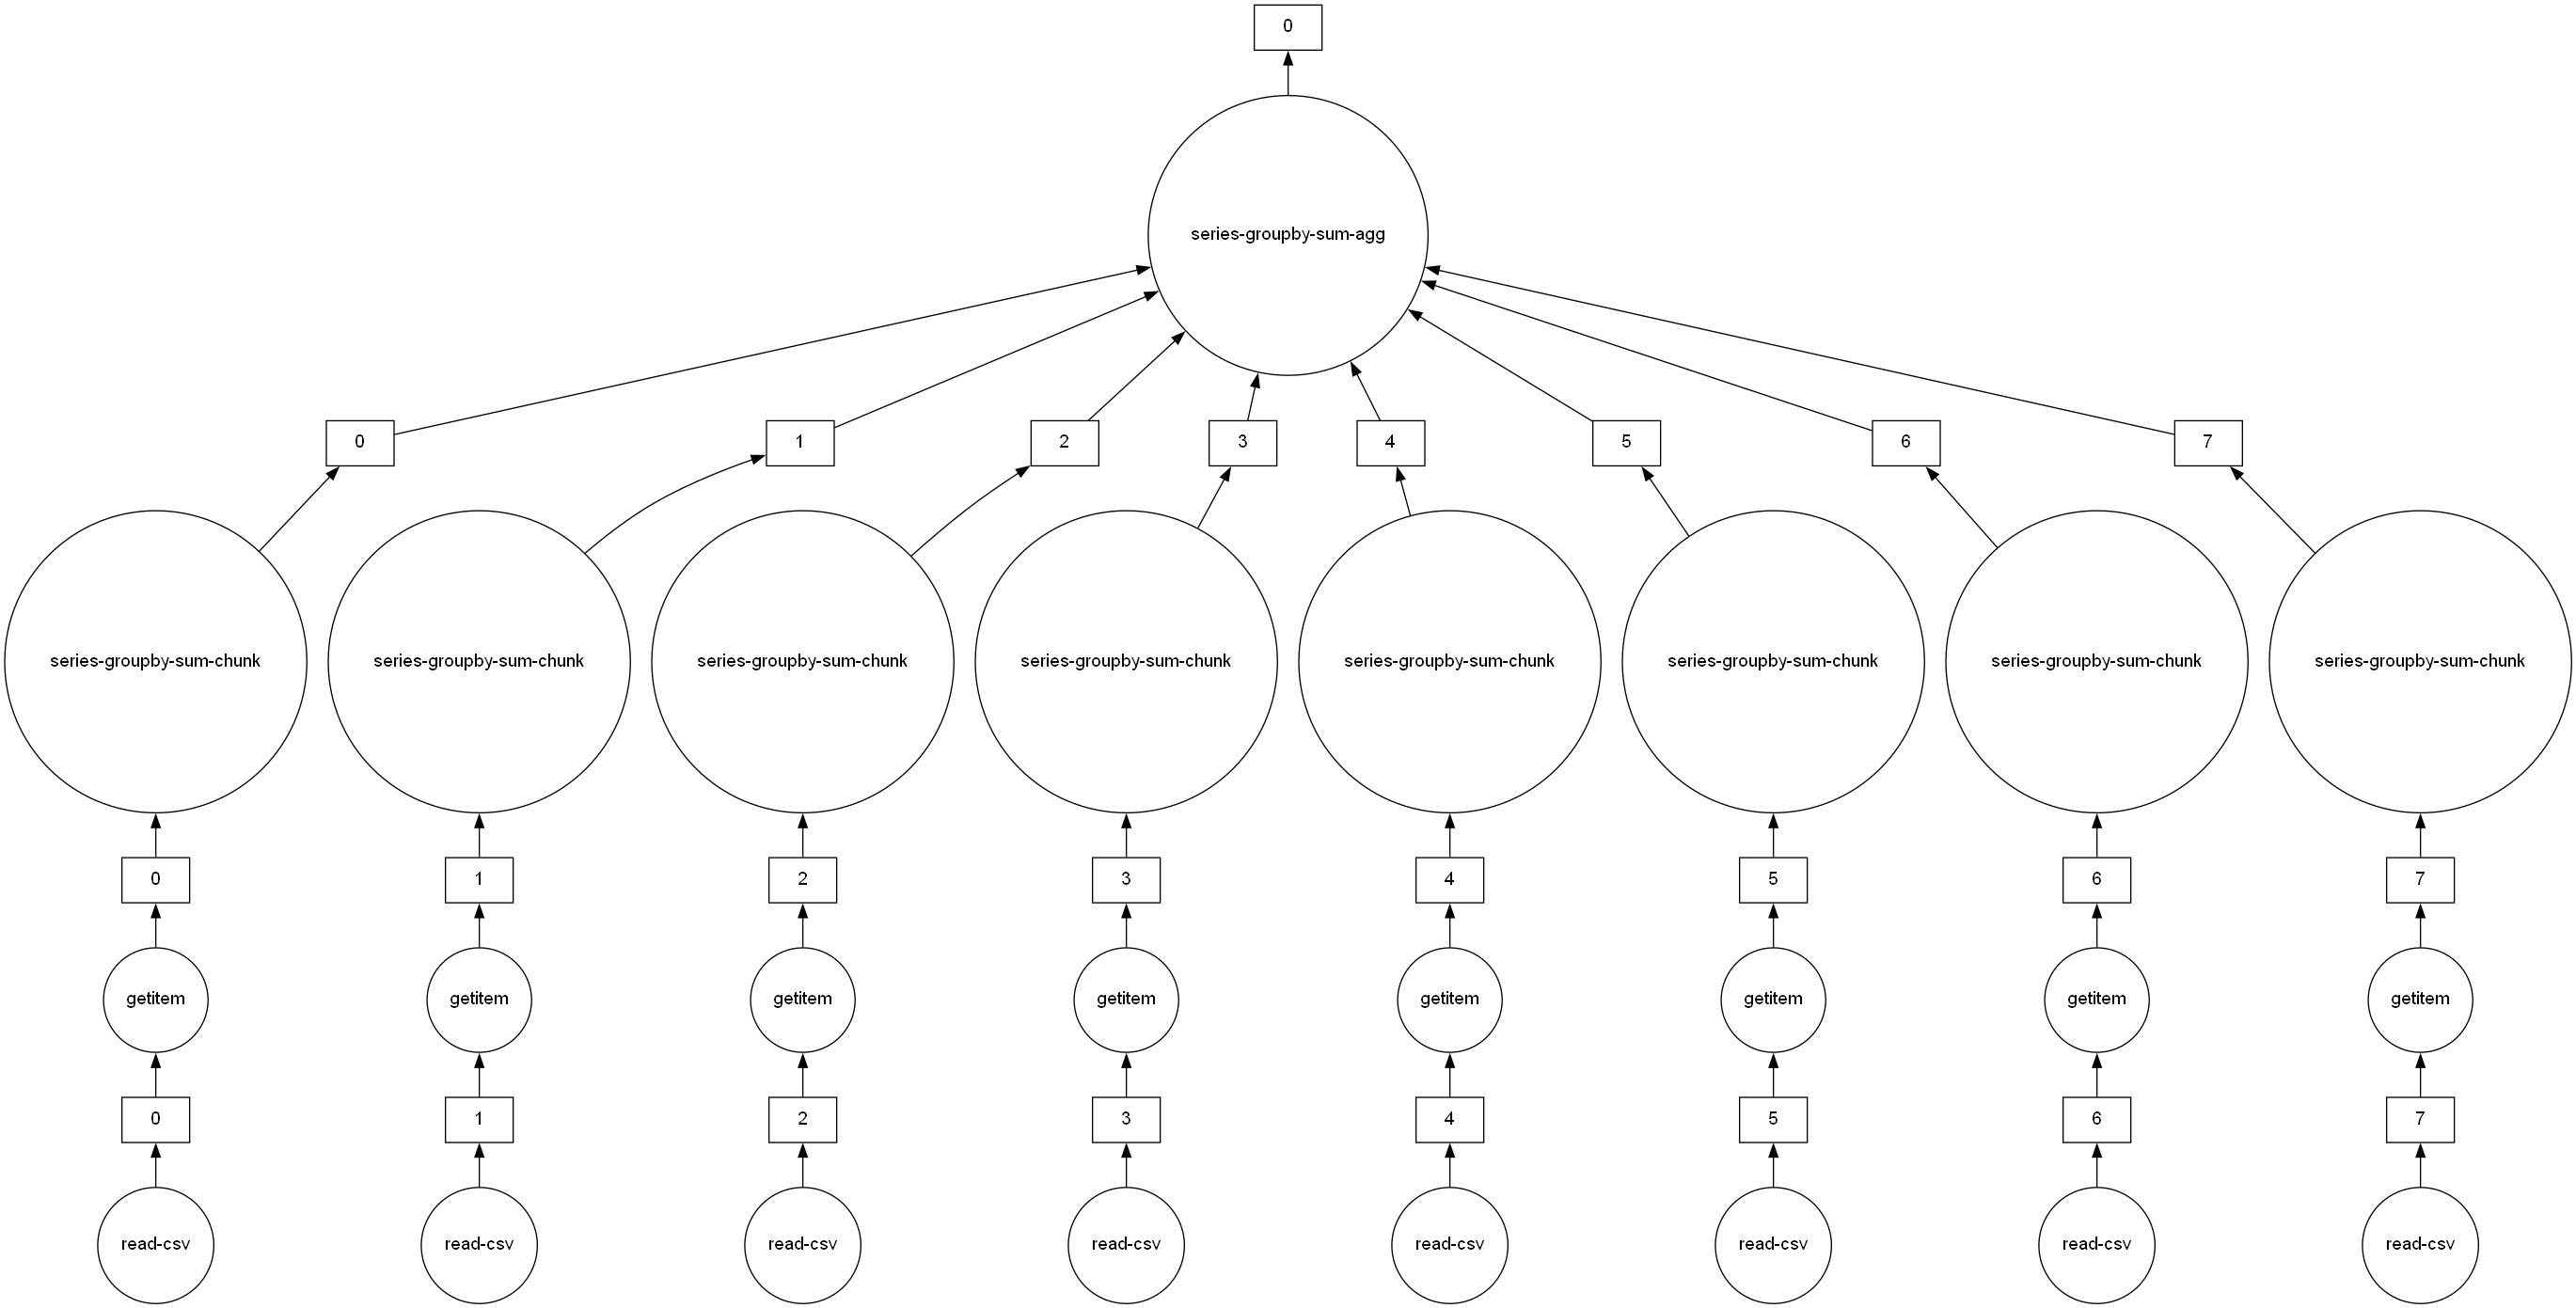

In [35]:
import dask.dataframe as dd
#births = dd.read_csv('births.csv', assume_missing = True)
births = dd.read_csv('births.csv', blocksize = 30000, assume_missing = True)
bornd = births.groupby('day').births.sum()
print(births.npartitions)
bornd.visualize()


In [36]:
borndm = births.groupby('month').births.sum()
borndm.visualize()
births.map_partitions(len).compute()


0    1966
1    1956
2    1970
3    1958
4    1957
5    1962
6    1950
7    1828
dtype: int64

In [37]:

births['decade'] = 10 * (births['year'] // 10)
bornd = births.groupby('decade').births.sum()
%time bornd.compute()


CPU times: total: 15.6 ms
Wall time: 83.6 ms


decade
1960.0     3600206.0
1970.0    33384625.0
1980.0    37553803.0
1990.0    39900007.0
2000.0    37335737.0
Name: births, dtype: float64

In [92]:
import dask.dataframe as dd
cars = dd.read_csv('USA_cars_datasets.csv')
colors = cars['color'].value_counts()
single_color = list(colors[colors < 5].index)
condition  = cars['color'].isin(single_color)
cars['color'] = cars['color'].mask(condition,'Other')
colors = cars['color'].value_counts().compute()

In [38]:
%%time

births = births.dropna()
bdate =  dd.to_datetime(births[['year', 'month', 'day']], errors = 'coerce')
births = births.assign(Data = bdate).dropna()
births = births.set_index('Data')
births['1970-01-01':'1970-01-25']['births'].sum().compute()


CPU times: total: 109 ms
Wall time: 984 ms


242450.0

In [39]:
%%time

bm = births['births'].resample('Y')
bm.sum().compute()

CPU times: total: 0 ns
Wall time: 376 ms


Data
1969-12-31    3598578.0
1970-12-31    3734606.0
1971-12-31    3563074.0
1972-12-31    3265863.0
1973-12-31    3145670.0
1974-12-31    3170306.0
1975-12-31    3153366.0
1976-12-31    3176266.0
1977-12-31    3332048.0
1978-12-31    3338197.0
1979-12-31    3499737.0
1980-12-31    3617948.0
1981-12-31    3635480.0
1982-12-31    3685374.0
1983-12-31    3642731.0
1984-12-31    3673531.0
1985-12-31    3765054.0
1986-12-31    3760682.0
1987-12-31    3813211.0
1988-12-31    3913786.0
Freq: A-DEC, Name: births, dtype: float64

In [40]:
%%time
births.groupby(['year','month']).sum( numeric_only='False').compute()

CPU times: total: 0 ns
Wall time: 298 ms


day    births    decade
year   month                           
1969.0 1.0    992.0  293876.0  121520.0
       2.0    812.0  270534.0  109760.0
       3.0    992.0  296436.0  121520.0
       4.0    930.0  282470.0  117600.0
       5.0    992.0  289018.0  121520.0
...             ...       ...       ...
1988.0 8.0    992.0  354599.0  122760.0
       9.0    930.0  347277.0  118800.0
       10.0   992.0  331632.0  122760.0
       11.0   930.0  314666.0  118800.0
       12.0   992.0  322327.0  122760.0

[240 rows x 3 columns]

In [41]:
%%time

births = dd.read_csv('births.csv', blocksize = 50000, assume_missing = True)
temps = dd.read_csv('temps.csv', blocksize = 50000, assume_missing = True)

birthst = births.merge(temps,on = ['year','month', 'day'], how = 'left')
birthst.compute()

CPU times: total: 93.8 ms
Wall time: 439 ms


,year,month,day,gender,births,temp
0,1969.0,1.0,2.0,F,4454.0,0.135008
1,1969.0,1.0,2.0,M,4548.0,0.135008
2,1969.0,1.0,4.0,F,4440.0,0.892524
3,1969.0,1.0,4.0,M,4520.0,0.892524
4,1969.0,1.0,8.0,F,4800.0,0.490344
...,...,...,...,...,...,...
3167,1985.0,7.0,18.0,M,5769.0,0.070321
3168,1985.0,7.0,20.0,F,4540.0,0.068300
3169,1985.0,7.0,20.0,M,4835.0,0.068300
3170,1985.0,7.0,27.0,F,4647.0,0.837824


In [42]:
%%time
import dask.dataframe as dd

births = dd.read_csv('births.csv', assume_missing = True)
bdate =  dd.to_datetime(births[['year', 'month', 'day']], errors = 'coerce')
births = births.assign(Data = bdate).dropna()
births = births.set_index('Data')

temps = dd.read_csv('temps.csv', assume_missing = True)
bdatet =  dd.to_datetime(temps[['year', 'month', 'day']], errors = 'coerce')
temps = temps.assign(Data = bdatet).dropna()
temps = temps.set_index('Data')
birthst = births.join(temps['temp'],how = 'inner')
birthst.compute()

CPU times: total: 78.1 ms
Wall time: 678 ms


,year,month,day,gender,births,temp
Data,,,,,,
1969-01-01,1969.0,1.0,1.0,F,4046.0,0.702092
1969-01-01,1969.0,1.0,1.0,M,4440.0,0.702092
1969-01-02,1969.0,1.0,2.0,F,4454.0,0.135008
1969-01-02,1969.0,1.0,2.0,M,4548.0,0.135008
1969-01-03,1969.0,1.0,3.0,F,4548.0,0.258240
...,...,...,...,...,...,...
1988-12-29,1988.0,12.0,29.0,M,5944.0,0.996027
1988-12-30,1988.0,12.0,30.0,F,5742.0,0.106615
1988-12-30,1988.0,12.0,30.0,M,6095.0,0.106615


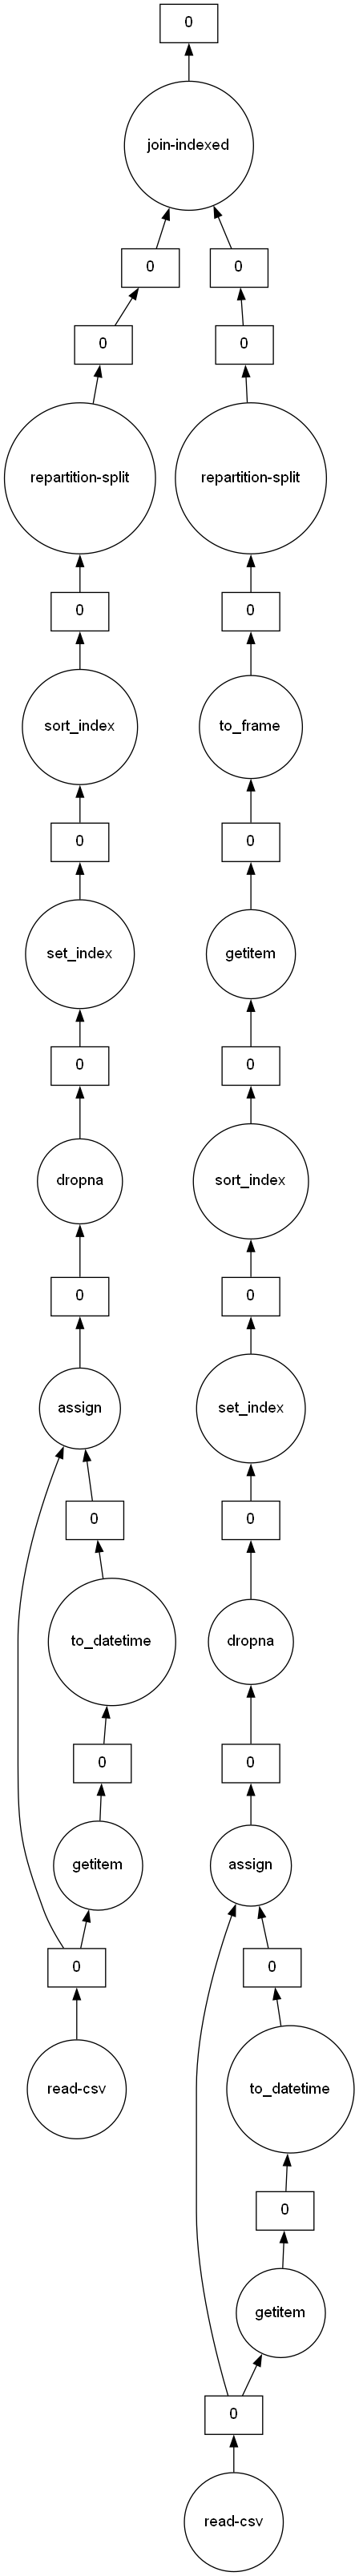

In [43]:
birthst.visualize()

In [44]:
%time birthst = births.merge(temps,on = ['year','month', 'day'], how = 'left').compute()

CPU times: total: 15.6 ms
Wall time: 185 ms


In [45]:
%time birthst = births.join(temps['temp'],how = 'inner').compute()

CPU times: total: 0 ns
Wall time: 145 ms


In [25]:
# trebuie instalat modulul: pip install httpfs , pip install aiohttp
# va citi mai multe fisiere JSON in paralel
import dask.bag as db
import json
events = db.read_text('https://archive.analytics.mybinder.org/events-2023-03-*.jsonl').map(json.loads)
count = events.count().compute()
print(count)
events.take(1)

170422


({'build_token': True,
  'origin': 'gke.mybinder.org',
  'provider': 'GitHub',
  'ref': '8fb9bbc66afc190c2d73411a7790094a1ddc9801',
  'schema': 'binderhub.jupyter.org/launch',
  'spec': 'tpaviot/pythonocc-binderhub/7.7.0',
  'status': 'success',
  'timestamp': '2023-03-01T00:00:00+00:00',
  'version': 5},)

In [57]:
fevent = events.filter(lambda record: 'master' in record['spec'])
fevent
#fevent.map(json.dumps).to_textfiles('dask*.json')
small = fevent.groupby(lambda record: record['provider']).compute()
small[0][0]

'Git'

In [59]:
%%time
dask_event = events.map(lambda record: record['spec']).frequencies(sort = True).compute()
dask_event

CPU times: total: 688 ms
Wall time: 12 s


[('Qiskit/platypus-binder/production', 15194),
 ('Petlja/AnalizaPodatakaOS8/master', 12113),
 ('matplotlib/mpl-brochure-binder/main', 10079),
 ('hanlpbot/hanlp-binder/main', 9674),
 ('ipython/ipython-in-depth/HEAD', 6783),
 ('Petlja/AnalizaPodatakaGim2/master', 6492),
 ('qiskit-community/qiskit-textbook/thebe-stable', 3687),
 ('binder-examples/requirements/HEAD', 3498),
 ('apache/spark/5103e00c4c', 3099),
 ('ipython/ipython-in-depth/master', 2681),
 ('binder-examples/r/HEAD', 2499),
 ('JuanSaudio/Blog/master', 2404),
 ('ines/spacy-course/binder', 2274),
 ('spyder-ide/binder-environments/spyder-stable', 2171),
 ('jupyterlab/jupyterlab-demo/HEAD', 2128),
 ('jupyter-xeus/xeus-cling/stable', 2106),
 ('ManimCommunity/jupyter_examples/HEAD', 2043),
 ('explosion/spacy-io-binder/spacy.io', 2039),
 ('numba/numba-examples/master', 2002),
 ('bokeh/bokeh-notebooks/master', 1672),
 ('voila-dashboards/voila/stable', 1588),
 ('freechipsproject/chisel-bootcamp/master', 1580),
 ('scikit-learn/scikit-le

In [60]:
%%time
import dask.dataframe as dd
df = events.to_dataframe()
df.spec.value_counts().compute()


CPU times: total: 812 ms
Wall time: 14.6 s


Qiskit/platypus-binder/production                                   15194
Petlja/AnalizaPodatakaOS8/master                                    12113
matplotlib/mpl-brochure-binder/main                                 10079
hanlpbot/hanlp-binder/main                                           9674
ipython/ipython-in-depth/HEAD                                        6783
                                                                    ...  
Igaime/YouTube_API_analisys_PewDiePie/main                              1
bussilab/karplus-equations/HEAD                                         1
khanhnamle1994/movielens/master                                         1
khanrc/tf.gans-comparison/master                                        1
joselzofio/Benchmarking_Economic_Efficiency_Julia_Notebooks/main        1
Name: spec, Length: 6482, dtype: int64

In [61]:
%%time
def extract_properties(record):
   return{
       't': record['timestamp'],
       's': record['spec']
    }
dff = events.map(extract_properties).to_dataframe()
#dff.head(3)
dff.s.value_counts().compute()

CPU times: total: 1.17 s
Wall time: 13.4 s


Qiskit/platypus-binder/production                                   15194
Petlja/AnalizaPodatakaOS8/master                                    12113
matplotlib/mpl-brochure-binder/main                                 10079
hanlpbot/hanlp-binder/main                                           9674
ipython/ipython-in-depth/HEAD                                        6783
                                                                    ...  
Igaime/YouTube_API_analisys_PewDiePie/main                              1
bussilab/karplus-equations/HEAD                                         1
khanhnamle1994/movielens/master                                         1
khanrc/tf.gans-comparison/master                                        1
joselzofio/Benchmarking_Economic_Efficiency_Julia_Notebooks/main        1
Name: s, Length: 6482, dtype: int64

In [31]:

list(events.pluck('provider').distinct())

['GitHub', 'Gist', 'GitLab', 'Git', 'Dataverse', 'Zenodo']

In [62]:
client.shutdown()